<a href="https://colab.research.google.com/github/2v/misc_colab_notebooks/blob/main/LLaVA_Med.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Cloning Modified LLaVa-Med GitHub Repo

In [2]:
!git clone https://github.com/2v/LLaVA-Med

Cloning into 'LLaVA-Med'...
remote: Enumerating objects: 477, done.
remote: Counting objects: 100% (180/180), done.
remote: Compressing objects: 100% (110/110), done.
remote: Total 477 (delta 105), reused 108 (delta 68), pack-reused 297
Receiving objects: 100% (477/477), 77.51 MiB | 21.76 MiB/s, done.
Resolving deltas: 100% (170/170), done.
Updating files: 100% (233/233), done.


In [3]:
%cd /content/LLaVA-Med

/content/LLaVA-Med


In [4]:
!pip install --upgrade pip

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 14.8 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 23.1.2
    Uninstalling pip-23.1.2:
      Successfully uninstalled pip-23.1.2


In [5]:
!pip install shortuuid

In [6]:
!pip uninstall torch torchvision -y
!pip install torch==2.0.0+cu117 torchvision==0.15.1+cu117 torchaudio==2.0.1 --index-url https://download.pytorch.org/whl/cu117
!pip install openai==0.27.8
!pip uninstall transformers -y
!pip install git+https://github.com/huggingface/transformers@cae78c46
!pip install -e .

Found existing installation: torch 2.1.0+cu121
Uninstalling torch-2.1.0+cu121:
  Successfully uninstalled torch-2.1.0+cu121
Found existing installation: torchvision 0.16.0+cu121
Uninstalling torchvision-0.16.0+cu121:
  Successfully uninstalled torchvision-0.16.0+cu121
Looking in indexes: https://download.pytorch.org/whl/cu117
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 GB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.1/6.1 MB 93.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 80.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.3/63.3 MB 32.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.3/132.3 kB 11.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lit: filename=lit-15.0.7-py3-none-any.whl size=89990 sha256=de5372408e24a5827ddb75bee5fa5aef8b0c71d58b120705367e6166b0556a28
  Stored in directory: /root/.cache/pip/wheels/27/2c/b6/3ed2983b1b44fe0dea1bb35234b09f

In [7]:
!pip install einops ninja open-clip-torch
!pip install flash-attn --no-build-isolation

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.6/44.6 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 18.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.4/53.4 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 29.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 15.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for flash-attn: filename=flash_attn-2.4.2-cp310-cp310-linux_x86_64.whl size=113930372 sha256=2c7ddc942e0715ef4a7ab62e3404b519a7ac040b3b6eae8fedcdc08a36ced786
  Stored in directory: /root/.cache/pip/wheels/9d/cf/7f/d14555553b5b30698dae0a4159fdd058157e7021cec565ecaa
Successfully built flash-attn


# Download the evaluation files and images

## Downloading Medical Instruct Tuning Data (Optional)

In [ ]:
%ls

CODE_OF_CONDUCT.md  download_data.sh  llava/           pyproject.toml  SECURITY.md
data/               images/           llava.egg-info/  README.md       SUPPORT.md
docs/               LICENSE           playground/      scripts/        test.py


In [ ]:
%mkdir data/pmc_articles
%mkdir data/images

In [ ]:
!python3 llava/data/download_images.py \
  --input_path data/llava_med_image_urls_eval.jsonl \
  --pmc_output_path data/pmc_articles/ \
  --images_output_path data/images/

100% 50/50 [01:03<00:00,  1.26s/it]
Untarring PMC articles
100% 50/50 [00:02<00:00, 21.60it/s]
Copying images
100% 50/50 [00:00<00:00, 4041.69it/s]


## Downloading VQA-RAD Data

In [8]:
%cd data

/content/LLaVA-Med/data


In [9]:
%mkdir VQA_RAD

In [10]:
!wget -O VQA_RAD.zip https://files.osf.io/v1/resources/89kps/providers/osfstorage/?zip=

--2024-01-02 17:15:43--  https://files.osf.io/v1/resources/89kps/providers/osfstorage/?zip=
Resolving files.osf.io (files.osf.io)... 35.186.214.196
Connecting to files.osf.io (files.osf.io)|35.186.214.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘VQA_RAD.zip’

VQA_RAD.zip             [  <=>               ]  16.14M   123KB/s    in 2m 17s  

2024-01-02 17:18:01 (120 KB/s) - ‘VQA_RAD.zip’ saved [16925478]



In [11]:
!unzip VQA_RAD.zip -d VQA_RAD

Archive:  VQA_RAD.zip
  inflating: VQA_RAD/Readme.docx     
  inflating: VQA_RAD/VQA_RAD Dataset Public.json  
  inflating: VQA_RAD/VQA_RAD Dataset Public.xml  
  inflating: VQA_RAD/VQA_RAD Dataset Public.xlsx  
  inflating: VQA_RAD/VQA_RAD Image Folder/synpic100176.jpg  
  inflating: VQA_RAD/VQA_RAD Image Folder/synpic100132.jpg  
  inflating: VQA_RAD/VQA_RAD Image Folder/synpic100228.jpg  
  inflating: VQA_RAD/VQA_RAD Image Folder/synpic60423.jpg  
  inflating: VQA_RAD/VQA_RAD Image Folder/synpic60703.jpg  
  inflating: VQA_RAD/VQA_RAD Image Folder/synpic60254.jpg  
  inflating: VQA_RAD/VQA_RAD Image Folder/synpic60831.jpg  
  inflating: VQA_RAD/VQA_RAD Image Folder/synpic60543.jpg  
  inflating: VQA_RAD/VQA_RAD Image Folder/synpic60096.jpg  
  inflating: VQA_RAD/VQA_RAD Image Folder/synpic59935.jpg  
  inflating: VQA_RAD/VQA_RAD Image Folder/synpic59536.jpg  
  inflating: VQA_RAD/VQA_RAD Image Folder/synpic59356.jpg  
  inflating: VQA_RAD/VQA_RAD Image Folder/synpic59126.jpg  
  inf

## Downloading Image Challenge

In [11]:
%cd /content

/content


In [12]:
!cp /content/drive/MyDrive/benchmark_image_challenge.zip /content

In [13]:
!unzip benchmark_image_challenge.zip -d /content/LLaVA-Med/data/benchmark_image_challenge

Archive:  benchmark_image_challenge.zip
 extracting: /content/LLaVA-Med/data/benchmark_image_challenge/benchmark_high_res.json  
 extracting: /content/LLaVA-Med/data/benchmark_image_challenge/images_high_res/ImageChallenge_01_01_2009.jpg  
 extracting: /content/LLaVA-Med/data/benchmark_image_challenge/images_high_res/ImageChallenge_01_01_2015.jpg  
 extracting: /content/LLaVA-Med/data/benchmark_image_challenge/images_high_res/ImageChallenge_01_02_2014.jpg  
 extracting: /content/LLaVA-Med/data/benchmark_image_challenge/images_high_res/ImageChallenge_01_02_2020.jpg  
 extracting: /content/LLaVA-Med/data/benchmark_image_challenge/images_high_res/ImageChallenge_01_03_2008.jpg  
 extracting: /content/LLaVA-Med/data/benchmark_image_challenge/images_high_res/ImageChallenge_01_03_2013.jpg  
 extracting: /content/LLaVA-Med/data/benchmark_image_challenge/images_high_res/ImageChallenge_01_03_2019.jpg  
 extracting: /content/LLaVA-Med/data/benchmark_image_challenge/images_high_res/ImageChallenge_

In [14]:
!cp /content/drive/MyDrive/prompts.py /content/LLaVA-Med/data/benchmark_image_challenge

## Modify Benchmarks

In [15]:
%cd /content/LLaVA-Med/data/eval

/content/LLaVA-Med/data/eval


In [16]:
# Run a script to change the image challenge benchmark keys to align with the instruct data
!python3 adjust_benchmark_image_challenge.py

In [10]:
# Run a script to change the VQA RAD benchmark keys to align with the instruct data
!python3 adjust_benchmark_vqa_rad.py

Traceback (most recent call last):
  File "/content/LLaVA-Med/data/eval/adjust_benchmark_vqa_rad.py", line 37, in <module>
    modify_json_keys_path_vqa('../VQA_RAD/VQA_RAD Dataset Public.json', '../VQA_RAD/vqa_rad_qa.json')
  File "/content/LLaVA-Med/data/eval/adjust_benchmark_vqa_rad.py", line 5, in modify_json_keys_path_vqa
    with open(file_path, 'r') as file:
FileNotFoundError: [Errno 2] No such file or directory: '../VQA_RAD/VQA_RAD Dataset Public.json'


In [17]:
%cd /content/LLaVA-Med

/content/LLaVA-Med


# Experimenting with LLaVA-Med Eval Script

In [18]:
import argparse
from transformers import AutoTokenizer, AutoModelForCausalLM, AutoConfig
import torch
import os
import json
from tqdm import tqdm
import shortuuid
from llava import LlavaLlamaForCausalLM
from llava.conversation import conv_templates
from llava.utils import disable_torch_init
from transformers import CLIPVisionModel, CLIPImageProcessor, StoppingCriteria
from PIL import Image
import random
import math

In [31]:
DEFAULT_IMAGE_TOKEN = "<image>"
DEFAULT_IMAGE_PATCH_TOKEN = "<im_patch>"
DEFAULT_IM_START_TOKEN = "<im_start>"
DEFAULT_IM_END_TOKEN = "<im_end>"

In [19]:
def split_list(lst, n):
    """Split a list into n (roughly) equal-sized chunks"""
    chunk_size = math.ceil(len(lst) / n)  # integer division
    return [lst[i:i+chunk_size] for i in range(0, len(lst), chunk_size)]


def get_chunk(lst, n, k):
    chunks = split_list(lst, n)
    return chunks[k]

In [20]:
def patch_config(config):
    patch_dict = {
        "use_mm_proj": True,
        "mm_vision_tower": "openai/clip-vit-large-patch14",
        "mm_hidden_size": 1024
    }

    cfg = AutoConfig.from_pretrained(config)
    if not hasattr(cfg, "mm_vision_tower"):
        print(f'`mm_vision_tower` not found in `{config}`, applying patch and save to disk.')
        for k, v in patch_dict.items():
            setattr(cfg, k, v)
        cfg.save_pretrained(config)


In [21]:
class KeywordsStoppingCriteria(StoppingCriteria):
    def __init__(self, keywords, tokenizer, input_ids):
        self.keywords = keywords
        self.tokenizer = tokenizer
        self.start_len = None
        self.input_ids = input_ids

    def __call__(self, output_ids: torch.LongTensor, scores: torch.FloatTensor, **kwargs) -> bool:
        if self.start_len is None:
            self.start_len = self.input_ids.shape[1]
        else:
            outputs = self.tokenizer.batch_decode(output_ids[:, self.start_len:], skip_special_tokens=True)[0]
            for keyword in self.keywords:
                if keyword in outputs:
                    return True
        return False



In [22]:
model_name_arg = "/content/drive/MyDrive/LLaVA-Med-7B"

disable_torch_init()
model_name = os.path.expanduser(model_name_arg)
tokenizer = AutoTokenizer.from_pretrained(model_name)

In [24]:
tokenizer

LlamaTokenizer(name_or_path='/content/drive/MyDrive/LLaVA-Med-7B', vocab_size=32000, model_max_length=1024, is_fast=False, padding_side='right', truncation_side='right', special_tokens={'bos_token': '</s>', 'eos_token': '</s>', 'unk_token': '<unk>', 'pad_token': '[PAD]'})

In [25]:
# args.mm_projector is None
patch_config(model_name)
print(model_name)

/content/drive/MyDrive/LLaVA-Med-7B


In [26]:
# biomed_clip not in model_name
model = LlavaLlamaForCausalLM.from_pretrained(model_name, torch_dtype=torch.float16, use_cache=True).cuda()
image_processor = CLIPImageProcessor.from_pretrained(model.config.mm_vision_tower, torch_dtype=torch.float16)
vision_tower = model.model.vision_tower[0]
vision_tower.to(device='cuda', dtype=torch.float16)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:72: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/4.52k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.71G [00:00<?, ?B/s]

Some weights of the model checkpoint at openai/clip-vit-large-patch14 were not used when initializing CLIPVisionModel: ['text_model.encoder.layers.4.layer_norm1.bias', 'text_model.encoder.layers.0.mlp.fc2.bias', 'text_model.encoder.layers.1.self_attn.out_proj.weight', 'text_model.encoder.layers.8.self_attn.v_proj.bias', 'text_model.encoder.layers.8.self_attn.q_proj.bias', 'text_model.encoder.layers.3.self_attn.v_proj.bias', 'text_model.encoder.layers.7.self_attn.out_proj.weight', 'text_model.encoder.layers.7.self_attn.q_proj.bias', 'text_model.encoder.layers.5.self_attn.v_proj.weight', 'text_model.encoder.layers.5.mlp.fc2.bias', 'text_model.encoder.layers.9.self_attn.v_proj.bias', 'text_model.encoder.layers.2.self_attn.out_proj.weight', 'text_model.encoder.layers.2.self_attn.out_proj.bias', 'text_model.encoder.layers.7.mlp.fc2.weight', 'visual_projection.weight', 'text_model.encoder.layers.5.self_attn.q_proj.weight', 'text_model.encoder.layers.6.mlp.fc1.bias', 'text_model.encoder.layer

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

CLIPVisionModel(
  (vision_model): CLIPVisionTransformer(
    (embeddings): CLIPVisionEmbeddings(
      (patch_embedding): Conv2d(3, 1024, kernel_size=(14, 14), stride=(14, 14), bias=False)
      (position_embedding): Embedding(257, 1024)
    )
    (pre_layrnorm): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
    (encoder): CLIPEncoder(
      (layers): ModuleList(
        (0-23): 24 x CLIPEncoderLayer(
          (self_attn): CLIPAttention(
            (k_proj): Linear(in_features=1024, out_features=1024, bias=True)
            (v_proj): Linear(in_features=1024, out_features=1024, bias=True)
            (q_proj): Linear(in_features=1024, out_features=1024, bias=True)
            (out_proj): Linear(in_features=1024, out_features=1024, bias=True)
          )
          (layer_norm1): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
          (mlp): CLIPMLP(
            (activation_fn): QuickGELUActivation()
            (fc1): Linear(in_features=1024, out_features=4096, bias=

In [29]:
model.model.vision_tower

[CLIPVisionModel(
   (vision_model): CLIPVisionTransformer(
     (embeddings): CLIPVisionEmbeddings(
       (patch_embedding): Conv2d(3, 1024, kernel_size=(14, 14), stride=(14, 14), bias=False)
       (position_embedding): Embedding(257, 1024)
     )
     (pre_layrnorm): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
     (encoder): CLIPEncoder(
       (layers): ModuleList(
         (0-23): 24 x CLIPEncoderLayer(
           (self_attn): CLIPAttention(
             (k_proj): Linear(in_features=1024, out_features=1024, bias=True)
             (v_proj): Linear(in_features=1024, out_features=1024, bias=True)
             (q_proj): Linear(in_features=1024, out_features=1024, bias=True)
             (out_proj): Linear(in_features=1024, out_features=1024, bias=True)
           )
           (layer_norm1): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
           (mlp): CLIPMLP(
             (activation_fn): QuickGELUActivation()
             (fc1): Linear(in_features=1024, out_

In [32]:
mm_use_im_start_end = getattr(model.config, "mm_use_im_start_end", False)
tokenizer.add_tokens([DEFAULT_IMAGE_PATCH_TOKEN], special_tokens=True)
if mm_use_im_start_end:
  tokenizer.add_tokens([DEFAULT_IM_START_TOKEN, DEFAULT_IM_END_TOKEN], special_tokens=True)

# import pdb; pdb.set_trace()
vision_config = vision_tower.config
vision_config.im_patch_token = tokenizer.convert_tokens_to_ids([DEFAULT_IMAGE_PATCH_TOKEN])[0]
vision_config.use_im_start_end = mm_use_im_start_end
if mm_use_im_start_end:
  vision_config.im_start_token, vision_config.im_end_token = tokenizer.convert_tokens_to_ids([DEFAULT_IM_START_TOKEN, DEFAULT_IM_END_TOKEN])

image_token_len = (vision_config.image_size // vision_config.patch_size) ** 2

In [33]:
tokenizer

LlamaTokenizer(name_or_path='/content/drive/MyDrive/LLaVA-Med-7B', vocab_size=32000, model_max_length=1024, is_fast=False, padding_side='right', truncation_side='right', special_tokens={'bos_token': '</s>', 'eos_token': '</s>', 'unk_token': '<unk>', 'pad_token': '[PAD]'})

In [ ]:
# questions = json.load(open(os.path.expanduser(args.question_file), "r"))
# questions = get_chunk(questions, args.num_chunks, args.chunk_idx)
# answers_file = os.path.expanduser(args.answers_file)
# os.makedirs(os.path.dirname(answers_file), exist_ok=True)
# os.makedirs(os.path.join(os.path.dirname(answers_file), "images"), exist_ok=True)
# ans_file = open(answers_file, "w")
# save_image_folder = os.path.join(os.path.dirname(os.path.expanduser(args.answers_file)), "images")

In [64]:

#idx = line["id"]
# question = line['conversations'][0]
# gt_ans = line["conversations"][1]

# try:
#   question = line["conversations"][0] # ['value'].split('\n')[0]
#   gt_ans = line["conversations"][1] # ['value']
# except:
#   question = line["conversatons"][0] # ['value'].split('\n')[0]
#   gt_ans = line["conversatons"][1] # ['value']

# qs = question['value']

idx = 1
qs = "What diagnosis is suggested by this fundus photograph from a 5-month-old girl? Select one of the following five options: ['Exudative retinitis', 'Primary infantile glaucoma', 'Retinopathy of prematurity', 'Retinoblastoma', 'Shaken-baby syndrome']"

qs = qs.replace('<image>', '').strip()
cur_prompt = qs

In [65]:
# TODO: try a few different images here, vqa rad version and image challenge version


#image_file = line["image"]
image_path = "data/benchmark_image_challenge/images_high_res/ImageChallenge_01_01_2009.jpg"
image = Image.open(image_path)


image_tensor = image_processor.preprocess(image, return_tensors='pt')['pixel_values'][0]

# let's see how image is processed here

images = image_tensor.unsqueeze(0).half().cuda()
if getattr(model.config, 'mm_use_im_start_end', False):
  qs = qs + '\n' + DEFAULT_IM_START_TOKEN + DEFAULT_IMAGE_PATCH_TOKEN * image_token_len + DEFAULT_IM_END_TOKEN
else:
  qs = qs + '\n' + DEFAULT_IMAGE_PATCH_TOKEN * image_token_len
cur_prompt = cur_prompt + '\n' + '<image>'

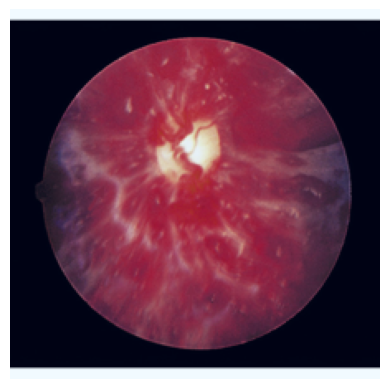

In [66]:
# preview what the preprocessed image looks like from CLIP image processor

import matplotlib.pyplot as plt
# Transposing the tensor to shape [244, 244, 3] for display
tensor = image_tensor.permute(1, 2, 0)

# Normalizing the tensor for display
tensor = (tensor - tensor.min()) / (tensor.max() - tensor.min())

# Displaying the tensor as an image
plt.imshow(tensor)
plt.axis('off')  # to turn off the axis
plt.show()

In [67]:
image_tensor.size()

torch.Size([3, 224, 224])

In [68]:
cur_prompt

"What diagnosis is suggested by this fundus photograph from a 5-month-old girl? Select one of the following five options: ['Exudative retinitis', 'Primary infantile glaucoma', 'Retinopathy of prematurity', 'Retinoblastoma', 'Shaken-baby syndrome']\n<image>"

In [69]:
conv_mode = 'simple'

if conv_mode == 'simple_legacy':
    qs += '\n\n### Response:'

# conv = default_conversation.copy()
conv = conv_templates[conv_mode].copy()
conv.append_message(conv.roles[0], qs)
prompt = conv.get_prompt()
inputs = tokenizer([prompt])

input_ids = torch.as_tensor(inputs.input_ids).cuda()

keywords = ['###']
stopping_criteria = KeywordsStoppingCriteria(keywords, tokenizer, input_ids)



In [70]:
conv

Conversation(system="A chat between a curious human and an artificial intelligence assistant. The assistant gives helpful, detailed, and polite answers to the human's questions.", roles=('Human', 'Assistant'), messages=[['Human', 'Hi!'], ['Assistant', 'Hi there!  How can I help you today?\n'], ['Human', "What diagnosis is suggested by this fundus photograph from a 5-month-old girl? Select one of the following five options: ['Exudative retinitis', 'Primary infantile glaucoma', 'Retinopathy of prematurity', 'Retinoblastoma', 'Shaken-baby syndrome']\n<im_start><im_patch><im_patch><im_patch><im_patch><im_patch><im_patch><im_patch><im_patch><im_patch><im_patch><im_patch><im_patch><im_patch><im_patch><im_patch><im_patch><im_patch><im_patch><im_patch><im_patch><im_patch><im_patch><im_patch><im_patch><im_patch><im_patch><im_patch><im_patch><im_patch><im_patch><im_patch><im_patch><im_patch><im_patch><im_patch><im_patch><im_patch><im_patch><im_patch><im_patch><im_patch><im_patch><im_patch><im_pa

In [71]:
with torch.inference_mode():
    output_ids = model.generate(
        input_ids,
        images=images,
        do_sample=True,
        temperature=0.7,
        max_new_tokens=1024,
        stopping_criteria=[stopping_criteria])

/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1211: UserWarning: You have modified the pretrained model configuration to control generation. This is a deprecated strategy to control generation and will be removed soon, in a future version. Please use a generation configuration file (see https://huggingface.co/docs/transformers/main_classes/text_generation)
  warnings.warn(


In [73]:
# TODO: new implementation
input_token_len = input_ids.shape[1]
n_diff_input_output = (input_ids != output_ids[:, :input_token_len]).sum().item()
if n_diff_input_output > 0:
    print(f'[Warning] Sample {i}: {n_diff_input_output} output_ids are not the same as the input_ids')
outputs = tokenizer.batch_decode(output_ids[:, input_token_len:], skip_special_tokens=True)[0]

if conv_mode == 'simple_legacy':
    while True:
        cur_len = len(outputs)
        outputs = outputs.strip()
        for pattern in ['###', 'Assistant:', 'Response:']:
            if outputs.startswith(pattern):
                outputs = outputs[len(pattern):].strip()
        if len(outputs) == cur_len:
            break

try:
    index = outputs.index(conv.sep)
except ValueError:
    outputs += conv.sep
    index = outputs.index(conv.sep)

outputs = outputs[:index].strip()


In [74]:
# prompt for answer is true
outputs_reasoning = outputs
inputs = tokenizer([prompt + outputs_reasoning + ' ###\nANSWER:'])

input_ids = torch.as_tensor(inputs.input_ids).cuda()

keywords = ['###']
stopping_criteria = KeywordsStoppingCriteria(keywords, tokenizer, input_ids)

with torch.inference_mode():
    output_ids = model.generate(
        input_ids,
        images=images,
        do_sample=True,
        temperature=0.7,
        max_new_tokens=64,
        stopping_criteria=[stopping_criteria])

input_token_len = input_ids.shape[1]
n_diff_input_output = (input_ids != output_ids[:, :input_token_len]).sum().item()
if n_diff_input_output > 0:
    print(f'[Warning] Sample {i}: {n_diff_input_output} output_ids are not the same as the input_ids')
outputs = tokenizer.batch_decode(output_ids[:, input_token_len:], skip_special_tokens=True)[0]

try:
    index = outputs.index(conv.sep)
except ValueError:
    outputs += conv.sep
    index = outputs.index(conv.sep)

outputs = outputs[:index].strip()
outputs = outputs_reasoning + '\n The answer is ' + outputs

In [75]:
outputs

"Assistant: The fundus photograph from the 5-month-old girl suggests a diagnosis of exudative retinitis.\n The answer is The fundus photograph from the 5-month-old girl, along with the color fundus findings and OCT findings, is highly suggestive of exudative retinitis. However, it's important to remember that a healthcare professional should be consulted for a definitive diagnosis and"

# Creating LLavA-Med and Fine-tuned Variants

## Download Delta Weights

In [ ]:
%cd /content

/content


In [ ]:
LLaVA-Med
!wget https://hanoverprod.z21.web.core.windows.net/med_llava/models/llava_med_in_text_60k_ckpt2_delta.zip
#!unzip "llava_med_in_text_60k_ckpt2_delta.zip"

--2023-12-29 23:16:46--  https://hanoverprod.z21.web.core.windows.net/med_llava/models/pvqa-9epoch_delta.zip
Resolving hanoverprod.z21.web.core.windows.net (hanoverprod.z21.web.core.windows.net)... 52.239.159.225
Connecting to hanoverprod.z21.web.core.windows.net (hanoverprod.z21.web.core.windows.net)|52.239.159.225|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11075002654 (10G) [application/zip]
Saving to: ‘pvqa-9epoch_delta.zip’

pvqa-9epoch_delta.z 100%[===================>]  10.31G  20.5MB/s    in 8m 15s  

2023-12-29 23:25:02 (21.3 MB/s) - ‘pvqa-9epoch_delta.zip’ saved [11075002654/11075002654]

--2023-12-29 23:25:02--  https://hanoverprod.z21.web.core.windows.net/med_llava/models/data_RAD-9epoch_delta.zip
Resolving hanoverprod.z21.web.core.windows.net (hanoverprod.z21.web.core.windows.net)... 52.239.159.225
Connecting to hanoverprod.z21.web.core.windows.net (hanoverprod.z21.web.core.windows.net)|52.239.159.225|:443... connected.
HTTP request sent, awai

In [ ]:
# LLaVA-Med PathVQA-finetuned
!wget https://hanoverprod.z21.web.core.windows.net/med_llava/models/pvqa-9epoch_delta.zip
!unzip "pvqa-9epoch_delta.zip"

In [ ]:
# LLaVA-Med VQA-RAD-finetuned
!wget https://hanoverprod.z21.web.core.windows.net/med_llava/models/data_RAD-9epoch_delta.zip
!unzip "data_RAD-9epoch_delta.zip"

--2023-12-30 21:17:51--  https://hanoverprod.z21.web.core.windows.net/med_llava/models/data_RAD-9epoch_delta.zip
Resolving hanoverprod.z21.web.core.windows.net (hanoverprod.z21.web.core.windows.net)... 52.239.159.225
Connecting to hanoverprod.z21.web.core.windows.net (hanoverprod.z21.web.core.windows.net)|52.239.159.225|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11063743501 (10G) [application/zip]
Saving to: ‘data_RAD-9epoch_delta.zip’

data_RAD-9epoch_del 100%[===================>]  10.30G  14.1MB/s    in 13m 13s 

2023-12-30 21:31:05 (13.3 MB/s) - ‘data_RAD-9epoch_delta.zip’ saved [11063743501/11063743501]

Archive:  data_RAD-9epoch_delta.zip
   creating: data_RAD-9epoch_delta/
  inflating: data_RAD-9epoch_delta/added_tokens.json  
  inflating: data_RAD-9epoch_delta/tokenizer_config.json  
  inflating: data_RAD-9epoch_delta/special_tokens_map.json  
  inflating: data_RAD-9epoch_delta/config.json  
  inflating: data_RAD-9epoch_delta/pytorch_model-00001-o

In [ ]:
# LLaVA-Med SLAKE-finetuned
!wget https://hanoverprod.z21.web.core.windows.net/med_llava/models/Slake1.0-9epoch_delta.zip
!unzip "Slake1.0-9epoch_delta.zip"

In [ ]:
%ls

data_RAD-9epoch_delta.zip  LLaVA-Med/             sample_data/
drive/                     pvqa-9epoch_delta.zip  Slake1.0-9epoch_delta.zip


## Get the LLaMa Weights

In [ ]:
%cd /content

/content


In [ ]:
!cp "/content/drive/My Drive/LLaMA" "/content" -r

In [ ]:
%ls

data_RAD-9epoch_delta/     LLaMA/              pvqa-9epoch_delta.zip   Slake1.0-9epoch_delta.zip
data_RAD-9epoch_delta.zip  LLaVA-Med/          sample_data/
drive/                     pvqa-9epoch_delta/  Slake1.0-9epoch_delta/


## Convert LLaMa weights to HF Transformers format

In [ ]:
!pip install accelerate

In [ ]:
%cd /content

/content


In [ ]:
!git clone https://github.com/huggingface/transformers.git

Cloning into 'transformers'...
remote: Enumerating objects: 175984, done.
remote: Counting objects: 100% (484/484), done.
remote: Compressing objects: 100% (309/309), done.
remote: Total 175984 (delta 239), reused 284 (delta 139), pack-reused 175500
Receiving objects: 100% (175984/175984), 175.52 MiB | 15.49 MiB/s, done.
Resolving deltas: 100% (133224/133224), done.


In [ ]:
%cd transformers

/content/transformers


In [ ]:
!git checkout cae78c46

Note: switching to 'cae78c46'.

You are in 'detached HEAD' state. You can look around, make experimental
changes and commit them, and you can discard any commits you make in this
state without impacting any branches by switching back to a branch.

If you want to create a new branch to retain commits you create, you may
do so (now or later) by using -c with the switch command. Example:

  git switch -c <new-branch-name>

Or undo this operation with:

  git switch -

Turn off this advice by setting config variable advice.detachedHead to false

HEAD is now at cae78c46d [safetensors] don't use in `torch<1.10` (#22370)


In [ ]:
!python /content/transformers/src/transformers/models/llama/convert_llama_weights_to_hf.py \
    --input_dir /content/LLaMA --model_size 7B --output_dir /content/hf_llama_7b

Fetching all parameters from the checkpoint at /content/LLaMA/7B.
Loading the checkpoint in a Llama model.
Loading checkpoint shards: 100% 33/33 [00:10<00:00,  3.08it/s]
Saving in the Transformers format.
Fetching the tokenizer from /content/LLaMA/tokenizer.model.


## Make model from Delta weights & LLaMA Weights

In [ ]:
%cd /content/LLaVA-Med

/content/LLaVA-Med


In [ ]:
# LLaVA-Med
!python3 -m llava.model.apply_delta \
    --base /content/hf_llama_7b \
    --target /content/LLaVA-Med-7B \
    --delta /content/llava_med_in_text_60k_ckpt2_delta

2023-12-18 20:55:05.730974: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-18 20:55:05.731030: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-18 20:55:05.732675: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-18 20:55:07.061555: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Loading base model
Loading checkpoint shards: 100% 2/2 [00:09<00:00,  4.69s/it]
Loading delta
config.json: 100% 4.52k/4.52k [00:00<00:00, 17.0MB/s]
model.safetensors: 100% 1.71G/1.71G [00:05<00:00, 312MB/s]
Some weights of the model checkpoi

In [ ]:
%ls

drive/  LLaVA-Med/  sample_data/


In [ ]:
# LLaVA-Med PathVQA-finetuned
!python3 -m llava.model.apply_delta \
    --base /content/hf_llama_7b \
    --target /content/LLaVA-Med-7B-PathVQA \
    --delta /content/pvqa-9epoch_delta

2023-12-29 23:58:07.532835: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-29 23:58:07.532921: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-29 23:58:07.668263: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-29 23:58:10.263842: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Loading base model
Loading checkpoint shards: 100% 2/2 [00:08<00:00,  4.46s/it]
Loading delta
config.json: 100% 4.52k/4.52k [00:00<00:00, 20.9MB/s]
model.safetensors: 100% 1.71G/1.71G [00:04<00:00, 371MB/s]
Some weights of the model checkpoi

In [ ]:
# LLaVA-Med VQA-RAD-finetuned
!python3 -m llava.model.apply_delta \
    --base /content/hf_llama_7b \
    --target /content/LLaVA-Med-7B-VQA-RAD \
    --delta /content/data_RAD-9epoch_delta

2023-12-30 21:41:42.280593: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-30 21:41:42.280719: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-30 21:41:42.413873: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-30 21:41:44.872697: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Loading base model
Loading checkpoint shards: 100% 2/2 [00:08<00:00,  4.26s/it]
Loading delta
config.json: 100% 4.52k/4.52k [00:00<00:00, 17.9MB/s]
model.safetensors: 100% 1.71G/1.71G [00:04<00:00, 419MB/s]
Some weights of the model checkpoi

In [ ]:
# LLaVA-Med SLAKE-finetuned
!python3 -m llava.model.apply_delta \
    --base /content/hf_llama_7b \
    --target /content/LLaVA-Med-7B-SLAKE \
    --delta /content/Slake1.0-9epoch_delta

2023-12-30 00:06:57.014786: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-30 00:06:57.014841: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-30 00:06:57.023372: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-30 00:06:59.202998: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Loading base model
Loading checkpoint shards: 100% 2/2 [01:10<00:00, 35.14s/it]
Loading delta
Some weights of the model checkpoint at openai/clip-vit-large-patch14 were not used when initializing CLIPVisionModel: ['text_model.encoder.layers.

## Copy these models to GDrive so that we don't have to repeat this process

In [ ]:
!cp "/content/LLaVA-Med-7B" "/content/drive/My Drive/LLaVA-Med-7B" -r

In [ ]:
!cp "/content/LLaVA-Med-7B-PathVQA" "/content/drive/My Drive/LLaVA-Med-7B-PathVQA" -r

In [ ]:
!cp "/content/LLaVA-Med-7B-VQA-RAD" "/content/drive/My Drive/LLaVA-Med-7B-VQA-RAD2" -r

In [ ]:
!cp "/content/LLaVA-Med-7B-SLAKE" "/content/drive/My Drive/LLaVA-Med-7B-SLAKE" -r

# Evaluating LLaVA-Med on Medical Visual Chat

In [ ]:
%ls

CODE_OF_CONDUCT.md  download_data.sh  llava/           pyproject.toml  SECURITY.md
data/               images/           llava.egg-info/  README.md       SUPPORT.md
docs/               LICENSE           playground/      scripts/        test.py


In [ ]:
%mkdir data/answers

mkdir: cannot create directory ‘data/answers’: File exists


In [ ]:
!python3 llava/eval/model_vqa.py \
    --model-name /content/drive/MyDrive/LLaVA-Med-7B \
    --question-file data/eval/llava_med_eval_qa50_qa.jsonl \
    --image-folder data/images/ \
    --answers-file data/answers/answer_file1.jsonl

2023-12-29 01:44:13.695704: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-29 01:44:13.695770: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-29 01:44:13.697197: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-29 01:44:14.845108: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
config.json: 100% 4.52k/4.52k [00:00<00:00, 19.0MB/s]
model.safetensors: 100% 1.71G/1.71G [00:06<00:00, 255MB/s]
Some weights of the model checkpoint at openai/clip-vit-large-patch14 were not used when initializing CLIPVisionModel: ['text_mo

For testing the VQA-RAD fine-tuned model, we will run it on the same dataset

In [ ]:
%cp data/answers/answer_file1.jsonl /content/drive/MyDrive/llava_med_files/answer_file1.json

In [ ]:
%cp data/answer_file1_pathvqa_test.jsonl /content/drive/MyDrive/llava_med_files/answer_file1_pathvqa_test.jsonl

In [ ]:
!python3 llava/eval/eval_multimodal_chat_gpt_score.py \
    --question_input_path data/eval/llava_med_eval_qa50_qa.jsonl \
    --input_path /data/answers/answer_file1.jsonl \
    --output_path /data/graded/answer_file1_graded.jsonl

# Evaluating LLaVA-Med on Multimodal Image Challenge

In [37]:
!python3 llava/eval/model_vqa_med.py \
    --model-name "/content/drive/MyDrive/LLaVA-Med-7B" \
    --question-file "data/benchmark_image_challenge/benchmark_high_res_multimodal_min.json" \
    --image-folder "data/benchmark_image_challenge/images_high_res" \
    --answers-file "/content/drive/MyDrive/llava_med_files/trial_1_2_24_llava_med_multimodal2.jsonl"

2024-01-03 04:32:57.850109: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-03 04:32:57.850157: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-03 04:32:57.851574: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-03 04:32:59.012003: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/content/drive/MyDrive/LLaVA-Med-7B
config.json: 100% 4.52k/4.52k [00:00<00:00, 20.7MB/s]
model.safetensors: 100% 1.71G/1.71G [00:08<00:00, 192MB/s]
Some weights of the model checkpoint at openai/clip-vit-large-patch14 were not used when ini

In [38]:
!python3 llava/eval/model_vqa_med.py \
    --model-name "/content/drive/MyDrive/LLaVA-Med-7B" \
    --question-file "data/benchmark_image_challenge/benchmark_high_res_image_only_min.json" \
    --image-folder "data/benchmark_image_challenge/images_high_res" \
    --answers-file "/content/drive/MyDrive/llava_med_files/trial_1_2_24_llava_med_image_only2.jsonl"

2024-01-03 05:20:14.436733: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-03 05:20:14.436786: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-03 05:20:14.438142: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-03 05:20:15.726300: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/content/drive/MyDrive/LLaVA-Med-7B
Some weights of the model checkpoint at openai/clip-vit-large-patch14 were not used when initializing CLIPVisionModel: ['text_model.encoder.layers.3.mlp.fc2.weight', 'text_model.encoder.layers.7.mlp.fc1.bi

In [39]:
!python3 llava/eval/model_vqa_med.py \
    --model-name "/content/drive/MyDrive/LLaVA-Med-7B" \
    --question-file "data/benchmark_image_challenge/benchmark_high_res_text_only_min.json" \
    --image-folder "data/benchmark_image_challenge/images_high_res" \
    --answers-file "/content/drive/MyDrive/llava_med_files/trial_1_2_24_llava_med_text_only2.jsonl"

2024-01-03 06:30:22.264219: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-03 06:30:22.264270: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-03 06:30:22.265689: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-03 06:30:23.582239: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/content/drive/MyDrive/LLaVA-Med-7B
Some weights of the model checkpoint at openai/clip-vit-large-patch14 were not used when initializing CLIPVisionModel: ['text_model.encoder.layers.6.self_attn.v_proj.weight', 'text_model.encoder.layers.3.s

In [ ]:
from google.colab import runtime
runtime.unassign()

## Evaluating VQA-RAD LLaVA-Med on Image Challenge

In [ ]:
!python3 llava/eval/model_vqa_med.py \
    --model-name "/content/drive/MyDrive/LLaVA-Med-7B-VQA-RAD" \
    --question-file "data/benchmark_image_challenge/benchmark_high_res_multimodal.json" \
    --image-folder "data/benchmark_image_challenge/images_high_res" \
    --answers-file "/content/drive/MyDrive/llava_med_files/trial_1_2_24_llava_med_multimodal.jsonl"

## Evaluating SLAKE LLaVA-Med on Image Challenge

In [ ]:
!python3 llava/eval/model_vqa_med.py \
    --model-name "/content/drive/MyDrive/LLaVA-Med-7B-SLAKE" \
    --question-file "data/benchmark_image_challenge/benchmark_high_res_multimodal.json" \
    --image-folder "data/benchmark_image_challenge/images_high_res" \
    --answers-file "/content/drive/MyDrive/llava_med_files/trial_1_2_24_llava_med_multimodal.jsonl"

## Evaluating Path VQALLaVA-Med on Image Challenge

In [ ]:
!python3 llava/eval/model_vqa_med.py \
    --model-name "/content/drive/MyDrive/LLaVA-Med-7B-PathVQA" \
    --question-file "data/benchmark_image_challenge/benchmark_high_res_multimodal.json" \
    --image-folder "data/benchmark_image_challenge/images_high_res" \
    --answers-file "/content/drive/MyDrive/llava_med_files/trial_1_2_24_llava_med_multimodal.jsonl"

# Evaluating Fine-Tuned VQA-RAD model on VQA-RAD dataset

Here, it is important to note that I could not figure out which entries were used in fine-tuning. So, performance will be dramatically overestimated here. However, it will show that we are running the model correctly which is all we are concerned about for benchmarking new data.

In [ ]:
%ls

CODE_OF_CONDUCT.md  download_data.sh  llava/           pyproject.toml  SECURITY.md
data/               images/           llava.egg-info/  README.md       SUPPORT.md
docs/               LICENSE           playground/      scripts/        test.py


In [ ]:
!python3 llava/eval/model_vqa_med.py \
    --model-name "/content/drive/MyDrive/LLaVA-Med-7B-VQA-RAD" \
    --question-file "data/VQA_RAD/vqa_rad_qa.json" \
    --image-folder "/content/LLaVA-Med/data/VQA_RAD/VQA_RAD Image Folder" \
    --answers-file "data/answer_file_vqa_rad.jsonl"

2023-12-31 01:26:36.763921: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-31 01:26:36.763975: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-31 01:26:36.765328: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-31 01:26:38.027142: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/content/drive/MyDrive/LLaVA-Med-7B-VQA-RAD
Some weights of the model checkpoint at openai/clip-vit-large-patch14 were not used when initializing CLIPVisionModel: ['text_model.encoder.layers.9.mlp.fc1.bias', 'text_model.encoder.layers.5.laye

In [ ]:
%cp data/answer_file_vqa_rad.jsonl /content/drive/MyDrive/llava_med_files/answer_file_vqa_rad3_closed.jsonl

# Serving

In [8]:
# Install xterm
!pip install colab-xterm
%load_ext colabxterm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.6/115.6 kB 2.5 MB/s eta 0:00:00


## Launch a controller

In [9]:
%xterm
# python -m llava.serve.controller --host 0.0.0.0 --port 10001

Launching Xterm...

<IPython.core.display.Javascript object>

In [10]:
%xterm
# python -m llava.serve.model_worker --host 0.0.0.0 --controller http://localhost:10001 --port 40000 --worker http://localhost:40000 --model-path /content/drive/MyDrive/LLaVA-Med-7B --multi-modal


Launching Xterm...

<IPython.core.display.Javascript object>

## Send a test message

In [ ]:
!python -m llava.serve.test_message --model-name LLaVA-Med-7B --controller http://localhost:10001

2024-01-01 18:25:49.037877: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-01 18:25:49.037946: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-01 18:25:49.039194: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-01 18:25:50.245532: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Models: ['LLaVA-Med-7B']
worker_addr: http://localhost:40000
A chat between a curious human and an artificial intelligence assistant. The assistant gives helpful, detailed, and polite answers to the human's questions.
Human: What are the key

In [ ]:
!python -m llava.serve.test_message --model-name LLaVA-Med-7B --controller http://localhost:10001

## Launch a gradio web server

In [ ]:
!python -m llava.serve.gradio_web_server --controller http://localhost:10001 --share

2024-01-03 03:05:18.176266: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-03 03:05:18.176324: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-03 03:05:18.177683: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-03 03:05:19.568761: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2024-01-03 03:05:23 | INFO | gradio_web_server | args: Namespace(host='0.0.0.0', port=None, controller_url='http://localhost:10001', concurrency_count=8, model_list_mode='once', share=True, moderate=False, embed=False)
2024-01-03 03:05:23 | 